In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iconic_Songs_Dataset.csv')

In [3]:
df.head(10)

,Title,Artist,Genre,ReleaseDate,Duration,Album,Popularity
0,Blinding Lights,The Weeknd,Pop,2024-01-05,3:22,After Hours,95
1,Levitating,Dua Lipa,Pop,2024-01-14,3:23,Future Nostalgia,93
2,Peaches,Justin Bieber ft. Daniel Caesar & Giveon,Pop,2024-02-12,3:18,Justice,91
3,Save Your Tears,The Weeknd,Pop,2024-02-18,3:36,After Hours,92
4,Good 4 U,Olivia Rodrigo,Pop,2024-03-05,2:58,SOUR,94
5,Stay,The Kid LAROI & Justin Bieber,Pop,2024-03-15,2:21,F*CK LOVE 3: OVER YOU,90
6,Kiss Me More,Doja Cat ft. SZA,Pop,2024-03-20,3:28,Planet Her,89
7,Montero (Call Me By Your Name),Lil Nas X,Pop,2024-04-10,2:18,Montero,88
8,Butter,BTS,K-Pop,2024-04-22,2:44,Butter,96
9,drivers license,Olivia Rodrigo,Pop,2024-05-05,4:02,SOUR,97


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        100 non-null    object
 1   Artist       100 non-null    object
 2   Genre        100 non-null    object
 3   ReleaseDate  100 non-null    object
 4   Duration     100 non-null    object
 5   Album        98 non-null     object
 6   Popularity   100 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [5]:
df.describe()

,Popularity
count,100.000000
mean,91.710000
std,3.806679
min,84.000000
25%,89.000000
50%,92.000000
75%,95.000000
max,99.000000


In [6]:
df.isnull().sum(axis=0)

Title          0
Artist         0
Genre          0
ReleaseDate    0
Duration       0
Album          2
Popularity     0
dtype: int64

In [7]:
df['Album'] = df['Album'].fillna('Unknown')
df.isnull().sum(axis=0)

Title          0
Artist         0
Genre          0
ReleaseDate    0
Duration       0
Album          0
Popularity     0
dtype: int64

In [8]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

In [9]:
df.dtypes

Title                  object
Artist                 object
Genre                  object
ReleaseDate    datetime64[ns]
Duration               object
Album                  object
Popularity              int64
dtype: object

In [10]:
print("Unique durations:", df['Duration'].unique())

Unique durations: ['3:22' '3:23' '3:18' '3:36' '2:58' '2:21' '3:28' '2:18' '2:44' '4:02'
 '3:32' '3:35' '4:58' '3:50' '3:45' '3:40' '3:46' '3:27' '3:30' '3:02'
 '3:58' '2:33' '2:25' '2:41' '4:08' '3:56' '3:41' '2:29' '3:34' '2:52'
 '3:03' '3:19' '2:54' '2:57' '3:48' '2:56' '2:35' '2:53' '3:10' '2:38'
 '4:21' '3:09' '2:43' '4:05' '2:51' '2:39' '3:57' '2:37' '3:11' '1:55'
 '3:01' '4:22' '3:04' '3:21' '3:59' '5:12' '4:13' '3:07' '4:30' '5:13'
 '3:37' '4:00' '4:14' '3:51' '3:42' '3:31' '3:06' '3:05' '3:13']


In [11]:
print("Popularity range:", df['Popularity'].min(), "-", df['Popularity'].max())

Popularity range: 84 - 99


In [12]:
df['Year'] = df['ReleaseDate'].dt.year
df['Month'] = df['ReleaseDate'].dt.month

In [13]:
df[['ReleaseDate', 'Year', 'Month']].head()

,ReleaseDate,Year,Month
0,2024-01-05,2024,1
1,2024-01-14,2024,1
2,2024-02-12,2024,2
3,2024-02-18,2024,2
4,2024-03-05,2024,3


In [14]:
artist_popularity = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

print(artist_popularity)

Artist
Shawn Mendes & Camila Cabello      99.0
Adele                              98.0
Mark Ronson ft. Bruno Mars         98.0
Lil Nas X ft. Billy Ray Cyrus      97.0
Panic! At The Disco                97.0
                                   ... 
Ariana Grande & Justin Bieber      86.0
SHAED                              85.0
Justin Bieber & Benny Blanco       85.0
Lil Nas X & Jack Harlow            85.0
Pop Smoke ft. Lil Baby & DaBaby    84.0
Name: Popularity, Length: 69, dtype: float64


In [15]:
# Filter songs released in a specific year
df_2024 = df[df['Year'] == 2024]

# Filter songs in a specific genre
df_pop = df[df['Genre'] == 'Pop']

In [16]:
df_2024.head()

,Title,Artist,Genre,ReleaseDate,Duration,Album,Popularity,Year,Month
0,Blinding Lights,The Weeknd,Pop,2024-01-05,3:22,After Hours,95,2024,1
1,Levitating,Dua Lipa,Pop,2024-01-14,3:23,Future Nostalgia,93,2024,1
2,Peaches,Justin Bieber ft. Daniel Caesar & Giveon,Pop,2024-02-12,3:18,Justice,91,2024,2
3,Save Your Tears,The Weeknd,Pop,2024-02-18,3:36,After Hours,92,2024,2
4,Good 4 U,Olivia Rodrigo,Pop,2024-03-05,2:58,SOUR,94,2024,3


In [17]:
df_pop.head()

,Title,Artist,Genre,ReleaseDate,Duration,Album,Popularity,Year,Month
0,Blinding Lights,The Weeknd,Pop,2024-01-05,3:22,After Hours,95,2024,1
1,Levitating,Dua Lipa,Pop,2024-01-14,3:23,Future Nostalgia,93,2024,1
2,Peaches,Justin Bieber ft. Daniel Caesar & Giveon,Pop,2024-02-12,3:18,Justice,91,2024,2
3,Save Your Tears,The Weeknd,Pop,2024-02-18,3:36,After Hours,92,2024,2
4,Good 4 U,Olivia Rodrigo,Pop,2024-03-05,2:58,SOUR,94,2024,3


In [18]:
df['Popularity_Normalized'] = (df['Popularity'] - df['Popularity'].min()) / (df['Popularity'].max() - df['Popularity'].min())
df[['Popularity', 'Popularity_Normalized']].head()

,Popularity,Popularity_Normalized
0,95,0.733333
1,93,0.600000
2,91,0.466667
3,92,0.533333
4,94,0.666667


In [19]:
# Convert 'Duration' column to numerical format (minutes)
df['Duration_Minutes'] = pd.to_numeric(df['Duration'].str.split(':').str[0]) + pd.to_numeric(df['Duration'].str.split(':').str[1]) / 60

Summary Statistics:
       Popularity  Duration_Minutes
count  100.000000        100.000000
mean    91.710000          3.367167
std      3.806679          0.604781
min     84.000000          1.916667
25%     89.000000          2.962500
50%     92.000000          3.366667
75%     95.000000          3.687500
max     99.000000          5.216667


C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


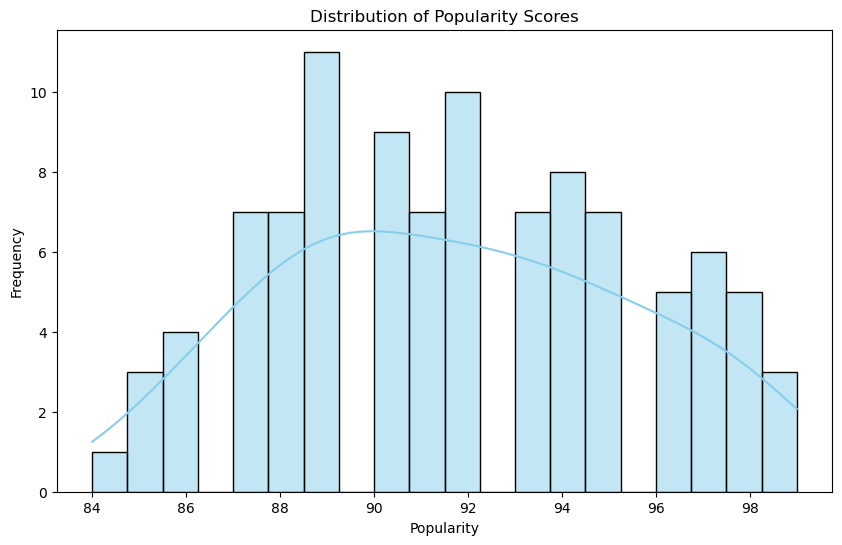

C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


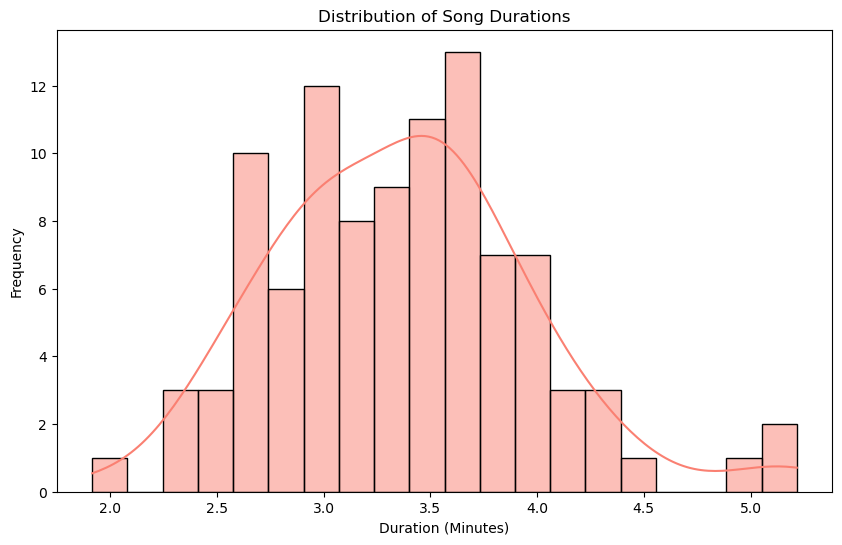

In [20]:
# Summary statistics
summary_stats = df[['Popularity', 'Duration_Minutes']].describe()
print("Summary Statistics:")
print(summary_stats)

# Histogram of Popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# Histogram of Duration
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration_Minutes'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

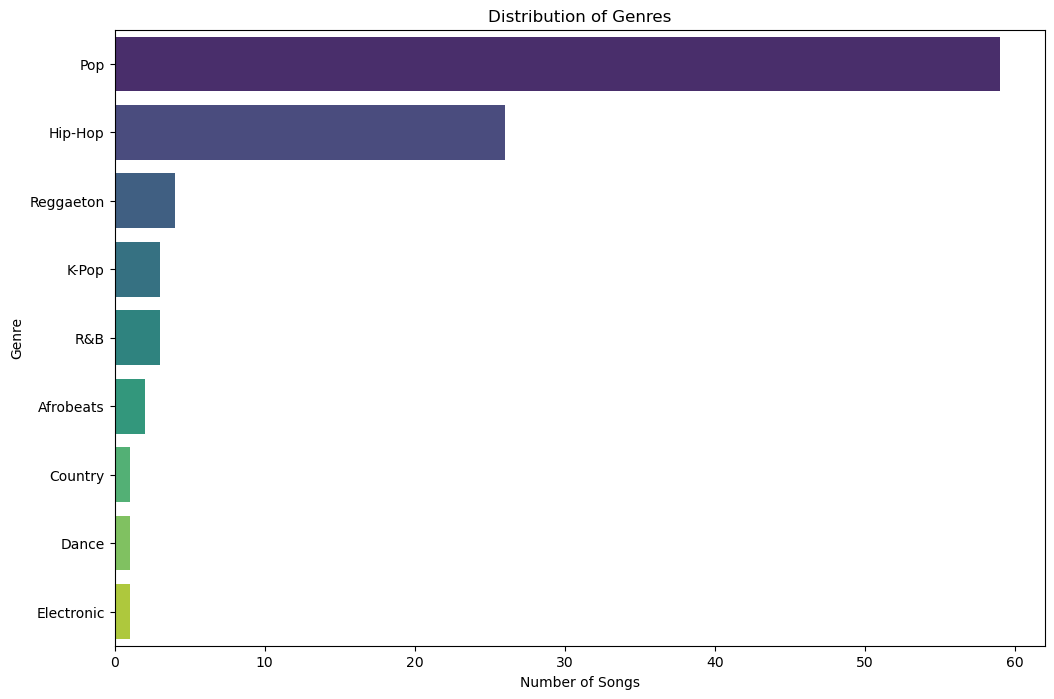

Top 5 Most Common Genres:


Genre
Pop          59
Hip-Hop      26
Reggaeton     4
K-Pop         3
R&B           3
Name: count, dtype: int64

In [21]:
# Count the number of songs in each genre
genre_counts = df['Genre'].value_counts()

# Plot the distribution of genres
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Distribution of Genres')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()

# Print the most common genres
print("Top 5 Most Common Genres:")
genre_counts.head()

C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


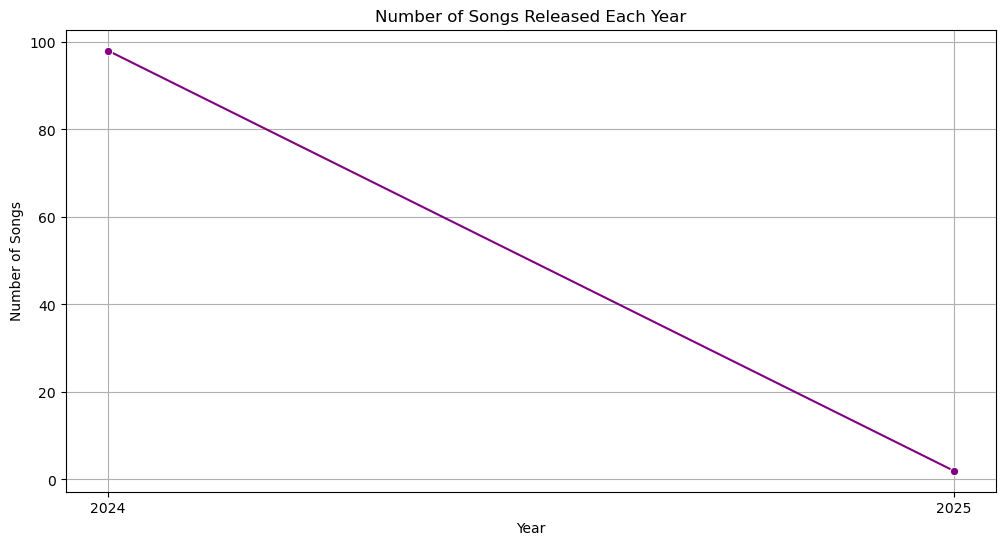

In [22]:
# Count the number of songs released each year
songs_per_year = df['ReleaseDate'].dt.year.value_counts().sort_index()

# Plot the number of songs released each year
plt.figure(figsize=(12, 6))
sns.lineplot(x=songs_per_year.index, y=songs_per_year.values, marker='o', color='purple')
plt.title('Number of Songs Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(songs_per_year.index)
plt.grid(True)
plt.show()

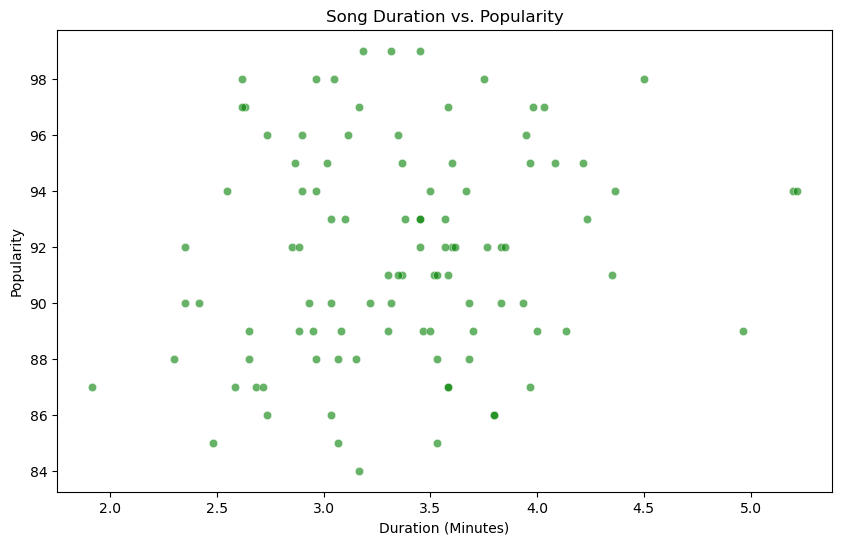

In [23]:
# Scatter plot of song duration vs. popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_Minutes', y='Popularity', data=df, color='green', alpha=0.6)
plt.title('Song Duration vs. Popularity')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Popularity')
plt.show()

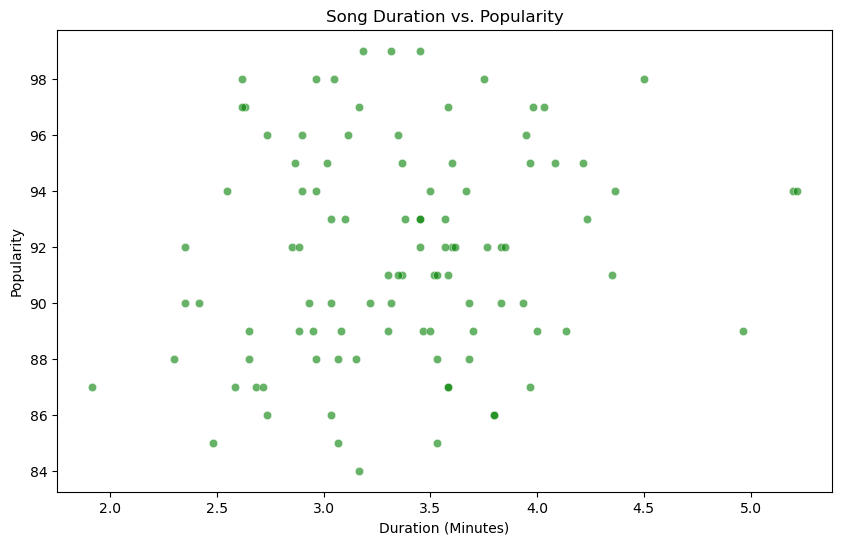

In [24]:
# Scatter plot of song duration vs. popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_Minutes', y='Popularity', data=df, color='green', alpha=0.6)
plt.title('Song Duration vs. Popularity')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Popularity')
plt.show()

Summary Statistics:
               ReleaseDate  Popularity         Year       Month  \
count                  100  100.000000   100.000000  100.000000   
mean   2024-07-08 15:21:36   91.710000  2024.020000    6.570000   
min    2024-01-05 00:00:00   84.000000  2024.000000    1.000000   
25%    2024-04-08 18:00:00   89.000000  2024.000000    3.750000   
50%    2024-07-10 00:00:00   92.000000  2024.000000    7.000000   
75%    2024-10-10 12:00:00   95.000000  2024.000000   10.000000   
max    2025-01-05 00:00:00   99.000000  2025.000000   12.000000   
std                    NaN    3.806679     0.140705    3.516929   

       Popularity_Normalized  Duration_Minutes  
count             100.000000        100.000000  
mean                0.514000          3.367167  
min                 0.000000          1.916667  
25%                 0.333333          2.962500  
50%                 0.533333          3.366667  
75%                 0.733333          3.687500  
max                 1.000000     

C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


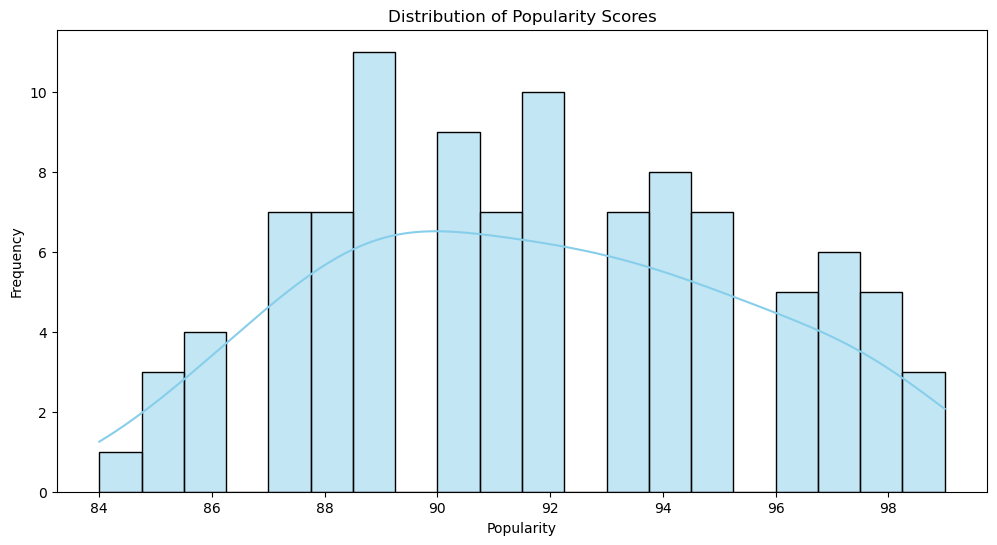

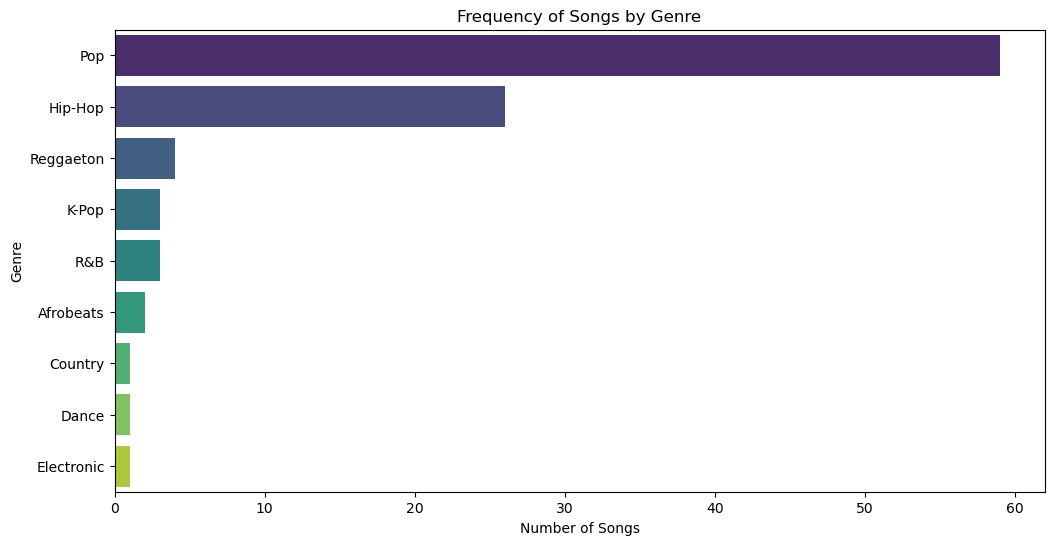

In [25]:
# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

# Distribution of variables
plt.figure(figsize=(12, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# Frequency counts for categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index, palette='viridis')
plt.title('Frequency of Songs by Genre')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()

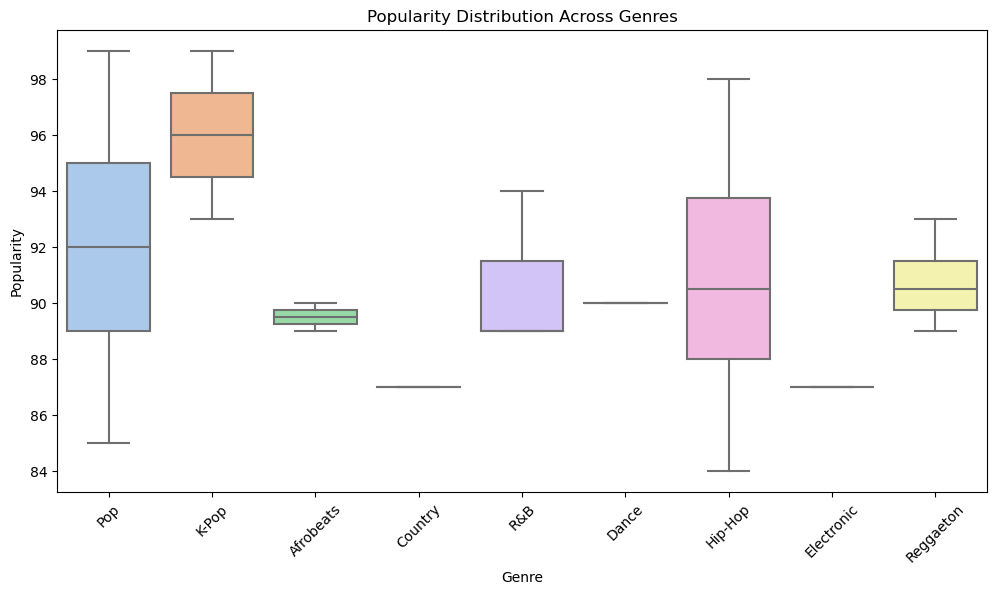

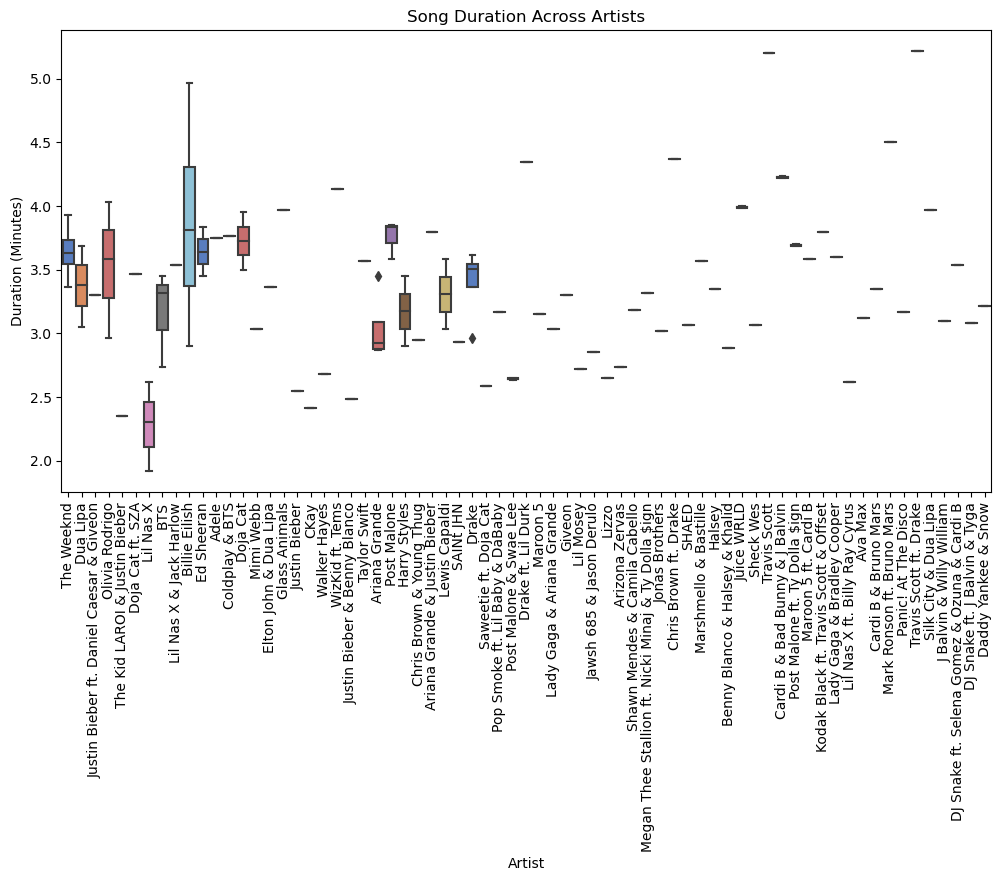

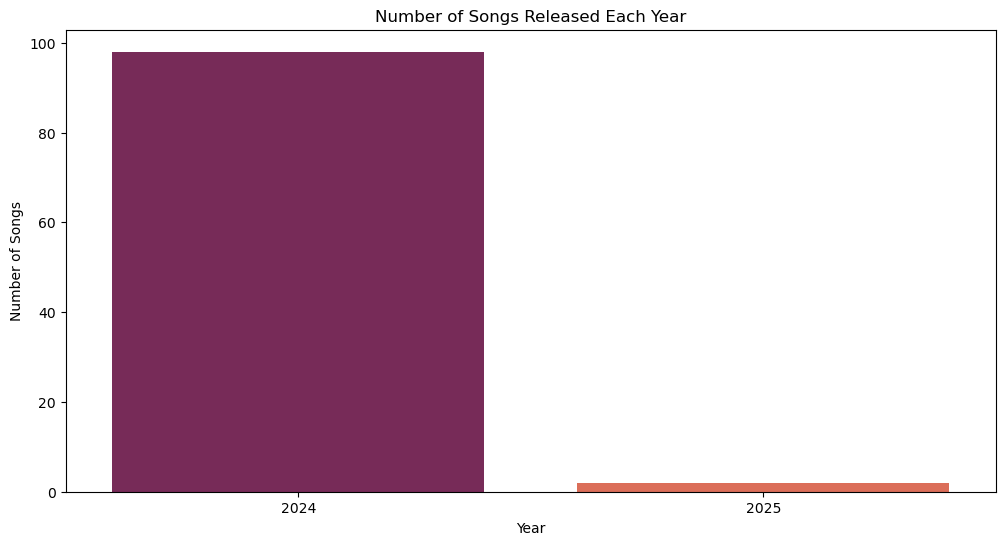

In [26]:
# Comparing popularity across different genres
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Popularity', data=df, palette='pastel')
plt.title('Popularity Distribution Across Genres')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

# Comparing song duration between different artists
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration_Minutes', data=df, palette='muted')
plt.title('Song Duration Across Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (Minutes)')
plt.xticks(rotation=90)
plt.show()

# Comparing the number of songs released by different artists or in different years
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df, palette='rocket')
plt.title('Number of Songs Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show()

C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


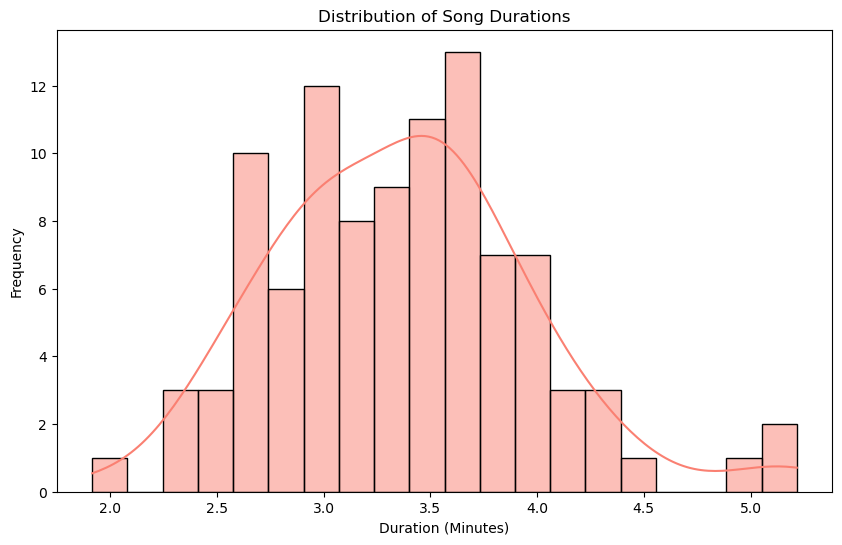

In [27]:
# Analyzing the distribution of song durations
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration_Minutes'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()